In [1]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Conv2D,Flatten, Reshape,LSTM

import keras.datasets
from sklearn import metrics
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pickle

Using TensorFlow backend.


In [ ]:
%matplotlib notebook

# Fitting a non-linear function

In [2]:
# generate some simulated data
n=1000
x=np.random.uniform(-6,6,n).reshape(-1,1)
# generate Y as cosine of x.
y=np.cos(x)+np.random.normal(0,.5,n).reshape(-1,1)
train_idx=list(range(0,int(.9*n)))
test_idx=list(range(int(.9*n),n))

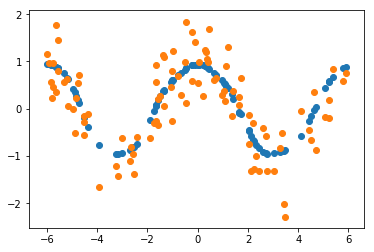

In [4]:
# clear session -- helps manage memory
K.clear_session()

# make model object
mod=Sequential()

# add model layers
mod.add(Dense(10,activation='relu',input_shape=(1,)))
mod.add(Dense(10,activation='relu'))
mod.add(Dense(1,activation='relu'))

# specify model estimation strategy -- minimize mse loss using adam
mod.compile('adam',loss='mse',metrics=['mae'])

# fit model
mod.fit(x[train_idx,:],y[train_idx],epochs=300,verbose=0)

# Generate predictions
yhat=mod.predict(x[test_idx])

# print metrics
print(metrics.mean_squared_error(y[test_idx],yhat))

# Produce visualization
plt.scatter(x[test_idx],yhat)
plt.scatter(x[test_idx],y[test_idx])
plt.show()

# Image parsing --  convolutional Model

In [6]:
digits=datasets.load_digits()

n=len(digits['data'])
train_idx=list(range(0,int(.9*n)))
test_idx=list(range(int(.9*n),n))


x=digits['data']
y=keras.utils.to_categorical(digits['target'],10)


In [11]:
mod=Sequential()
mod.add(Reshape(target_shape=(8,8,1),input_shape=(64,)))
mod.add(Conv2D(3,(4,4)))
mod.add(Flatten())
mod.add(Dense(10,activation='softmax'))

mod.compile('adam','categorical_crossentropy')
mod.fit(x[train_idx],y[train_idx],epochs=200,verbose=0)
yhat=np.argmax(mod.predict(x[test_idx]),1)

metrics.accuracy_score(np.argmax(y[test_idx],1),yhat)


0.92777777777777781

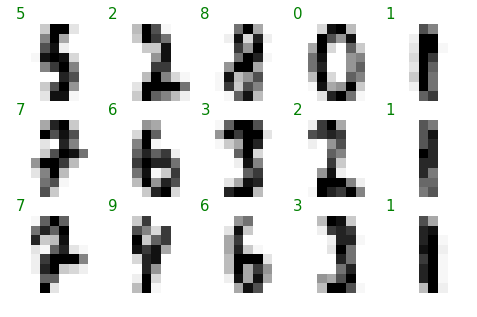

In [12]:
fig,ax=plt.subplots(3,5,figsize=(8,5))

ax=ax.reshape(-1)
for i in range(15):
    ax[i].imshow(x[test_idx][i,:].reshape(8,8),cmap='Greys')
    ax[i].text(-1,-1,yhat[i],color='green', fontsize=15)
    ax[i].axis('off')
plt.show()


# LSTM

data for this example is the unemployment rate, furnished by BLS, distributed by the St. Louis Federal Reserve.

> U.S. Bureau of Labor Statistics, Civilian Unemployment Rate [UNRATE], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/UNRATE, October 17, 2017.

Data is formatted and stored in a pickle for convenience. 
To see how this file was generated, or regenerate the pickle, you can examine the file data_gen.py This will require an API key from fred. 

Data is unemployment data with 36 lags, first, second differences and moving average included as well

In [14]:
x_train,y_train,x_test,y_test=pickle.load(open("ts_example.pck",'rb'))

print(x_train.shape)
print(y_train.shape)

(408, 36, 4)
(408,)


In [ ]:
K.clear_session()
# build model object
mod=Sequential()

# add layers
# 100 gives output h(x) but also sets the memory capacity. Default returns output from last item in sequence
mod.add(LSTM(100,input_shape=(36,4)))
mod.add(Dense(1))

# build model
mod.compile("adam",'mse')

# fit model
mod.fit(x_train,y_train,epochs=100,batch_size=200,verbose=0)

#generate predictions
yhat=mod.predict(x_test)



# print metrics
print(metrics.mean_absolute_error(yhat,y_test))

# Produce nice-looking plot
plt.plot(yhat)
plt.plot(y_test)
plt.show()